# Описание проекта "Принятие решений в бизнесе"


Вы — аналитик крупного интернет-магазина.
Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Приоритизация гипотез.

Подгрузим необходимые библеотеки

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

Скачаем данные и посмотрим

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**Описание данных.** 

9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Задачи

* Примените фреймворк ICE для приоритизации гипотез. 
* Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. 
* Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. 
* Объясните, почему так произошло.

In [3]:
# Применим фреймворк ICE для приоритизации гипотез.
data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts']

pd.options.display.max_colwidth = 100
# Выведем результат отсортировав их по убыванию приоритета.
display(data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2))


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [4]:
# Применим фреймворк RICE для приоритизации гипотез.
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']

pd.options.display.max_colwidth = 100
# Выведем результат отсортировав их по убыванию приоритета.
display(data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(1))


,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


## Анализ A/B-теста

Скачаем данные и посмотрим

In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# переименуем столбцы для удобства
orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'}, inplace=True)

# посмотрим
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Описание данных**

    orderId — идентификатор заказа;
    userId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Проверим данные на наличие дубликатов

In [6]:
# проверяем наличие пользователей в обеих группах
userId_AB = (orders.query('group=="A"')[['userId', 'orderId']]
             .merge(orders.query('group=="B"')[['userId', 'orderId']],on='userId', how='inner')
              )
userId_AB = userId_AB['userId'].unique()
len(userId_AB)

58

Удалим пользователей которые встречаются в обоих группах  из базы данных.

In [7]:
orders = orders[~orders['userId'].isin(userId_AB)].reset_index(drop=True)
orders

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,16490,B
1012,2662137336,3733762160,2019-08-14,6490,B
1013,2203539145,370388673,2019-08-14,3190,A
1014,1807773912,573423106,2019-08-14,10550,A


Загрузим и посмотрим на другую базу.

In [8]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Описание данных**

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Проверим датафрейм на дубликаты и пропуски.

In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
visitors.duplicated().sum()

0

# Задачи

**Проанализируйте A/B-тест:**

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups.apply
                    (lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                orders['group'] == x['group'])]
                                     .agg({'date' : 'max',
                                           'group' : 'max',
                                           'orderId' : 'nunique',
                                           'userId' : 'nunique',
                                           'revenue' : 'sum'}), axis=1)
                                     .sort_values(by=['date','group']))

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups.apply
                       (lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                  visitors['group'] == x['group'])]
                                        .agg({'date' : 'max', 
                                              'group' : 'max', 
                                              'visitors' : 'sum'}), axis=1)
                                        .sort_values(by=['date','group']))

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = (ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                                                            right_on=['date', 'group']))
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

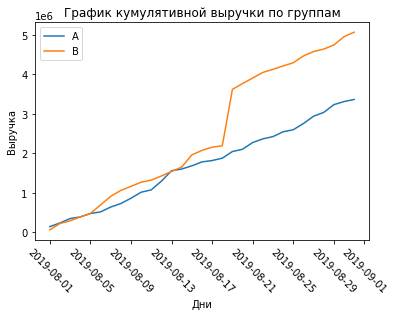

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дни')
plt.ylabel('Выручка')
plt.xticks(rotation=-45)

plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. На графике выручки группы В есть резкий рост. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

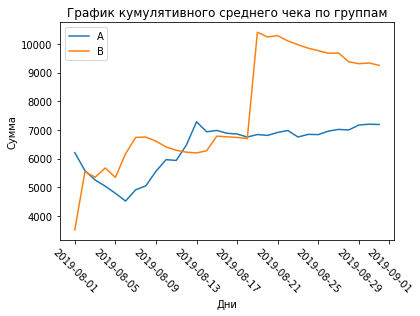

In [13]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дни')
plt.ylabel('Сумма')
plt.xticks(rotation=-45)

plt.legend(); 

Средний чек становится равномерным ближе к концу теста. Видим резкий скачок у группы В. Возможно, в группу B в середине теста попали крупные заказы.

### Построиме график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

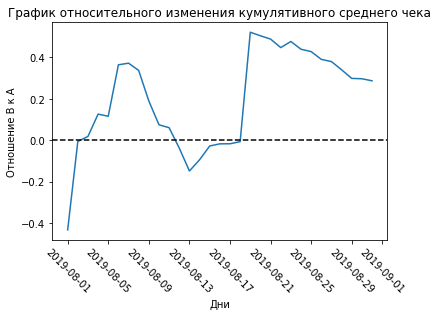

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дни')
plt.ylabel('Отношение В к А')
plt.xticks(rotation=-45)

plt.show();

В нескольких точках график различия между сегментами резко «скачет». Это указывает на крупные заказы и выбросы.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

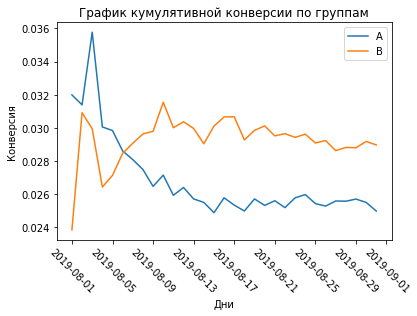

In [15]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дни')
plt.ylabel('Конверсия')
plt.xticks(rotation=-45)

plt.show();

Конверсия после всплесков вначале, стабилизировались. Конверсия группы В выше, чем группы А.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

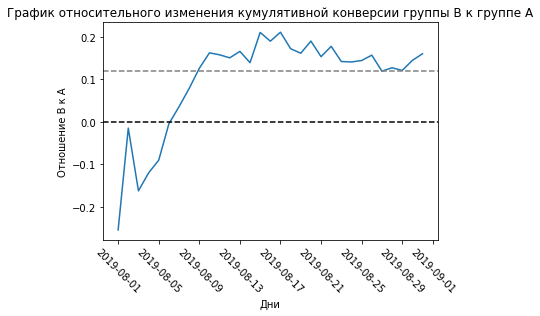

In [16]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                                 .merge(cumulativeDataB[['date','conversion']], 
                                        left_on='date', 
                                        right_on='date', 
                                        how='left', 
                                        suffixes=['A', 'B']))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")



plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дни')
plt.ylabel('Отношение В к А')
plt.xticks(rotation=-45)

plt.show;

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. В дальнейшим конверсия группы B была выше более чем на 12%.

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

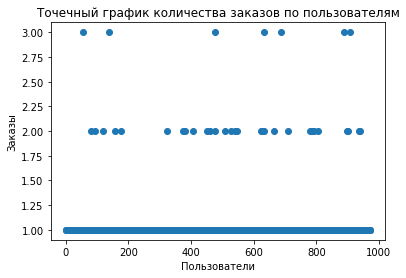

In [17]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

plt.show;

Много пользователей с 2 заказами. Есть пользователи и с 3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [18]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


Не более 5% пользователей оформляли больше чем 1 заказ. И не  более 1% пользователей оформляли больше чем 2 заказа.

Определим, что больше 1 заказа будет как граница для определения аномальных пользователей.

In [19]:
ordersByUsers_95 = np.percentile(ordersByUsers['orders'], 95)

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

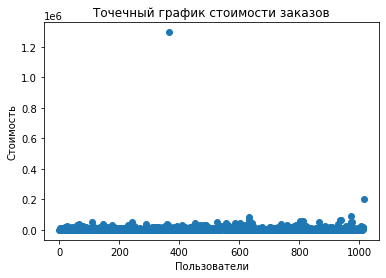

In [20]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')

plt.show;

Из-за одного явного выброса все значения слились в одну прямую. Нарисуем еще график ограничив стоимость заказа в 200000. 

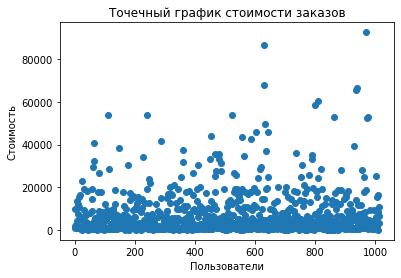

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'][orders['revenue'] < 200000])))
plt.scatter(x_values, orders['revenue'][orders['revenue'] < 200000])

plt.title('Точечный график стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')

plt.show;

Дорогих заказов не так уж и мало.Их надо отсечь выбрав границу аномальных заказов.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [22]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей.

26785 рублей выберем как границу для определения аномальных заказов.

In [23]:
orders_95 = np.percentile(orders['revenue'], 95)

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

Подготовим данные

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#print(data.head(5))

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [26]:
sampleA = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                                 len(ordersByUsersA['orders'])),
                                                      name='orders', ), ], axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                                 len(ordersByUsersB['orders'])),
                                                      name='orders', ), ], axis=0,)

Сформулируем гипотезы.

    Нулевая: различий в конверсии между группами нет. 
    Альтернативная: различия в конверсии между группами есть.

In [27]:
# p-value
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# относительный прирост конверсии группы B
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
0.160


Выводы:

p-value = 0.011 меньше 5%. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Принимаем альтернативную: различия в конверсии между группами есть.

Относительный выигрыш группы B равен 16%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформируем гипотезы.

Нулевая гипотеза: различий в среднем чеке между группами нет. 
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [28]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
0.287


Вывод

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
Средний чек группы B значительно выше (на 28.7%) среднего чека группы A.

**Очистим данные по выставленным ранее границам.**

In [29]:
print('Число заказов более:', ordersByUsers_95)
print('Сумма заказа более:', orders_95)

Число заказов более: 1.0
Сумма заказа более: 26785.0


In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ordersByUsers_95]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > ordersByUsers_95]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders_95]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.shape[0]) 

86


Аномальных пользователей 86 человек. Удалим их и проведем исследование по очищенным данным.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

Подготовим данные

In [31]:
sampleAFiltered = pd.concat([ordersByUsersA[
                            np.logical_not(ordersByUsersA['userId']
                              .isin(abnormalUsers))]['orders'],
                                    pd.Series(0, index=np.arange(
                                        data['visitorsPerDateA'].sum() - 
                                            len(ordersByUsersA['orders'])),
                                                name='orders', ), ], axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[
                            np.logical_not(ordersByUsersB['userId']
                              .isin(abnormalUsers))]['orders'],
                                    pd.Series(0, index=np.arange(
                                        data['visitorsPerDateB'].sum() - 
                                            len(ordersByUsersB['orders'])),
                                                name='orders', ), ], axis=0,) 

Сформулируем гипотезы.

    Нулевая: различий в конверсии между группами нет. 
    Альтернативная: различия в конверсии между группами есть.

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [32]:
# p-value
print('p-value: ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# относительный прирост конверсии группы B
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))  

p-value: 0.016
0.174


Вывод

p-value = 0.016 меньше 5%. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Принимаем альтернативную: различия в конверсии между группами есть.

По "сырым" данным p-value было 0.011, теперь стало 0.016.
Прирост конверсии группы В по "сырым" данным было 0.160, а стало 0.174.
После "очищения" данных прирост конверсии группы В изменился незначительно.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформируем гипотезы.

    Нулевая гипотеза: различий в среднем чеке между группами нет. 
    Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [33]:
print('p-value:', 
      '{0:.3f}'.format(stats.mannwhitneyu(
                        orders[np.logical_and(orders['group'] == 'A',
                               np.logical_not(orders['userId'].isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(orders['group'] == 'B',
                               np.logical_not(orders['userId'].isin(abnormalUsers)),)]['revenue'],
                        )
            [1])
)

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                              np.logical_not(orders['userId']
                                .isin(abnormalUsers)),)]['revenue'].mean()
                     / orders[np.logical_and(orders['group'] == 'A',
                              np.logical_not(orders['userId']
                                .isin(abnormalUsers)),)]['revenue'].mean()
        - 1)
) 

p-value: 0.727
-0.034


Вывод

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

P-value по "сырым" данным был 0.829, а стал 0.727. После очищения разница между сегментами сократилась с 28.7% до - 3.4%.

### Примим решение по результатам теста и объясним его.

    Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

По результатам теста принимаем решение остановить тест и объявить победителем группу В. 

   * Есть устойчивое статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
   * Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, однако после очищения, разница между группами сократилась на 32,1% и составила - 3.4%.
